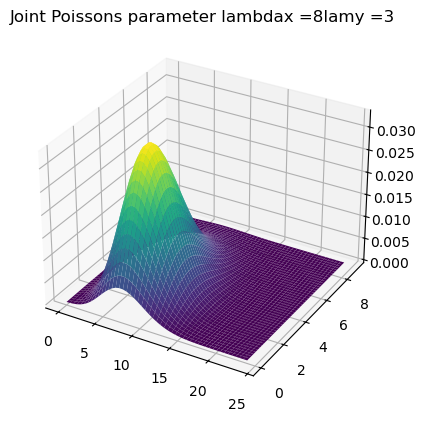

In [35]:
## Poisson Probability of event occurring, given 2 event-based poission processes
import math
import numpy
from scipy.special import factorial
lamx = 8
lamy = 3
def f(x,y):
    return ((lamx**x * numpy.exp(-lamx)) / factorial(x)) * (lamy**y * numpy.exp(-lamy)) / factorial(y)


x = np.linspace(0,3*lamx,50)
y = np.linspace(0,3*lamy,50)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title(f'Joint Poissons parameter lambdax ={lamx}lamy ={lamy}');


(array([ 44., 148., 248., 277., 179.,  67.,  28.,   6.,   2.,   1.]),
 array([ 1. ,  3.1,  5.2,  7.3,  9.4, 11.5, 13.6, 15.7, 17.8, 19.9, 22. ]),
 <BarContainer object of 10 artists>)

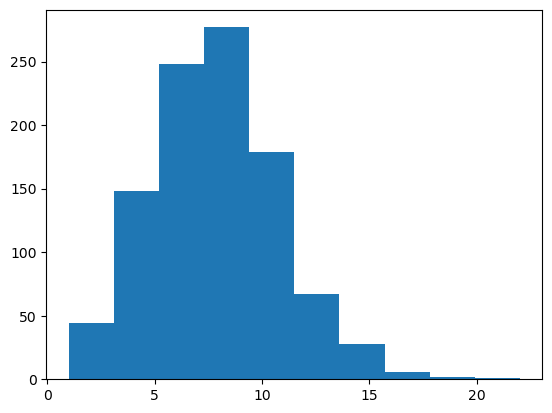

In [291]:
## Pulling distribution example to estimate distribution 
import numpy as np
import matplotlib 
size = 1000  # number of samples

samplesx = np.random.poisson(lam=lamx, size=size)

plt.hist(samplesx, bins = 10)